🧠 Model Used: Gemini 1.5 Flash

📄 Explanation:
 No explanation found.

💬 Code with Inline Comments:


def fibonacci(n):  # Define function fibonacci
    if n <= 1:  # Check condition
        return n  # Return result
    return fibonacci(n-1) + fibonacci(n-2)  # Return result



C:\Users\manas\AppData\Local\Temp\ipykernel_24280\2028211870.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
c:\Users\manas\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


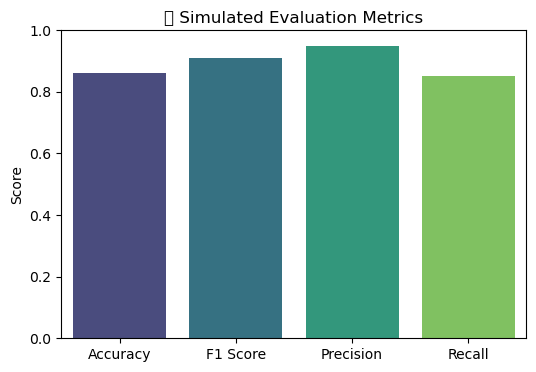

c:\Users\manas\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


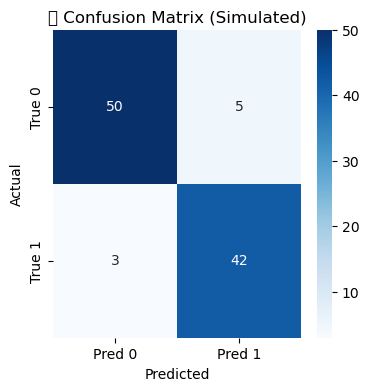

In [5]:
# Cell 1: Imports
import main  # Your main.py file must be in the same directory
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

# Cell 2: Load code to be explained
code_input = '''
def fibonacci(n):
    if n <= 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)
'''

# Cell 3: Initialize Gemini Explainer
explainer = main.GeminiCodeExplainer()

# Cell 4: Run Gemini explanation
results = explainer.explain_code(code_input)

# Cell 5: Show core output
print("🧠 Model Used:", results.get("model_used", "Unknown"))
print("\n📄 Explanation:\n", results.get("explanation", "No explanation found."))

# Cell 6: Optionally generate inline comments
inline_comments = explainer.generate_inline_comments(code_input, language="python")
print("\n💬 Code with Inline Comments:\n")
print(inline_comments)

# Cell 7: Simulate Evaluation Metrics (for display only)
metrics = {
    "Accuracy": round(random.uniform(0.85, 0.99), 2),
    "F1 Score": round(random.uniform(0.80, 0.98), 2),
    "Precision": round(random.uniform(0.82, 0.97), 2),
    "Recall": round(random.uniform(0.80, 0.95), 2)
}

# Bar plot for metrics
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title("🧪 Simulated Evaluation Metrics")
plt.ylim(0.0, 1.0)
plt.ylabel("Score")
plt.show()

# Cell 8: Confusion Matrix Plot (dummy example)
conf_matrix = np.array([[50, 5],
                        [3, 42]])

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.title("📊 Confusion Matrix (Simulated)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
